In [26]:
#mAKING A HYBRID DEEP LEARNING MODEL
#SOM + ANN

In [27]:
#Step1 - Identifying the frauds with SOMs
#Step2 - Going from unsupervised to supervised deep learning.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
%matplotlib inline

In [30]:
dataset = pd.read_csv('/home/tejas/Desktop/DLAZ/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [31]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [32]:
#Class column tells us whether the applicatn. was approved
#So we will divide the dataset between on the basis of class column
#to see how many frauds were rejected or selected.

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [33]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [34]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [35]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

In [36]:
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [37]:
#Training the SOM

In [38]:
from minisom import MiniSom

In [39]:
#x and y are the grid dimensions. As we have small data 10,10 is okay
#inpot_len - input nodes
#sigma - radius of the different neighbourhoods in the grid
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [40]:
#Init. wts.
som.random_weights_init(X)
#To train the data
som.train_random(X,num_iteration=100)

In [41]:
#Visualising the results

In [42]:
from pylab import bone,pcolor,colorbar,plot,show

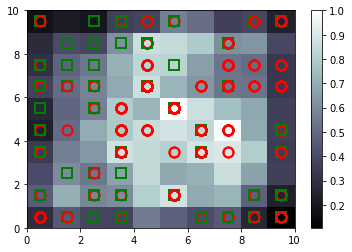

In [43]:
#This will init. the window that will collect the map
bone()
#Return all the dists. for all the winning nodes
pcolor(som.distance_map().T)
colorbar()

#Markers - 
#o - not approved
#s - approved
markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
    #i - index of customers
    #x - vectors of customers at the diff. iterations
    
    #This will give us the winning node of customer x
    w = som.winner(x)
    #On this winning node plot the marker
    #These are the co-ordinates of the winning node
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],
         markeredgecolor=colors[y[i]],markerfacecolor='None',
        markersize=10,markeredgewidth=2)

show()

In [44]:
#The frauds nodes are far from the general rule.
#The white ones indicate frauds

In [45]:
#Finding the frauds
mappings = som.win_map(X)

In [46]:
mappings

defaultdict(list,
            {(4,
              6): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.30921519, 1.        , 0.44240602, 0.17857143, 0.5       ,
                     0.15384615, 0.5       , 0.07894737, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.0705    , 0.        ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.28452042, 1.        , 0.14541353, 0.03571429, 0.5       ,
                     0.53846154, 0.375     , 0.01754386, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.14      , 0.        ]), array([0.50077484, 1. 

In [47]:
frauds = np.concatenate((mappings[(5,5)],mappings[(7,4)]),axis=0)

In [48]:
frauds

array([[5.07325941e-01, 1.00000000e+00, 5.16240602e-01, 2.15714286e-01,
        5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 2.69000000e-02],
       [5.15823152e-01, 1.00000000e+00, 4.12330827e-01, 4.76785714e-02,
        5.00000000e-01, 7.69230769e-02, 3.75000000e-01, 5.78947368e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 8.40000000e-02, 0.00000000e+00],
       [4.07389610e-01, 1.00000000e+00, 3.93533835e-01, 1.78571429e-01,
        5.00000000e-01, 1.53846154e-01, 5.00000000e-01, 7.36842105e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 2.75000000e-01, 0.00000000e+00],
       [1.41197058e-01, 1.00000000e+00, 1.26616541e-01, 2.08928571e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+0

In [49]:
#inverse the scaling
frauds = sc.inverse_transform(frauds.reshape(-1,15))

In [50]:
frauds

array([[1.5692408e+07, 1.0000000e+00, 4.8080000e+01, 6.0400000e+00,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 2.6910000e+03],
       [1.5694530e+07, 1.0000000e+00, 4.1170000e+01, 1.3350000e+00,
        2.0000000e+00, 2.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6800000e+02, 1.0000000e+00],
       [1.5667451e+07, 1.0000000e+00, 3.9920000e+01, 5.0000000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 2.1000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 5.5000000e+02, 1.0000000e+00],
       [1.5600975e+07, 1.0000000e+00, 2.2170000e+01, 5.8500000e-01,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [51]:
#Going from unsupervised to supervised

In [53]:
#We are not including the customer id (0th column)
customers = dataset.iloc[:, 1:].values

In [54]:
customers.shape

(690, 15)

In [55]:
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

In [56]:
#Making dependent variable

#Now we make a vector of 690(length of dataset) zeroes.We put 1 only
#at those id nos. which are frauds.
is_fraud = np.zeros(len(dataset))

In [58]:
for i in range(len(dataset)):
    #To check if a customer id is in the list of frauds
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [59]:
#Training the NN

In [60]:
#Feature scaling

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaled = StandardScaler()
customers = scaled.fit_transform(customers)

In [63]:
import keras


Using TensorFlow backend.


In [64]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [65]:
classifier = Sequential()

In [66]:
classifier.add(Dense(units=2,kernel_initializer='uniform',activation='relu',input_shape=(15,)))

In [67]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [68]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
classifier.fit(customers,is_fraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 2s 3ms/step - loss: 0.4672 - acc: 0.9609
Epoch 2/2
690/690 [==============================] - 1s 969us/step - loss: 0.1894 - acc: 0.9609


In [87]:
pred = classifier.predict(customers)

In [88]:
pred

array([[0.1339045 ],
       [0.1033557 ],
       [0.07920551],
       [0.04495045],
       [0.04146316],
       [0.02704693],
       [0.11284008],
       [0.02268722],
       [0.1365024 ],
       [0.03571934],
       [0.02908198],
       [0.02661853],
       [0.04534858],
       [0.02192146],
       [0.14157192],
       [0.22221577],
       [0.03332552],
       [0.03487381],
       [0.08662788],
       [0.03116071],
       [0.10117944],
       [0.04529005],
       [0.14237934],
       [0.10302262],
       [0.13141038],
       [0.03018878],
       [0.08674137],
       [0.05408552],
       [0.03402679],
       [0.04031499],
       [0.03251702],
       [0.06616291],
       [0.11229347],
       [0.02890273],
       [0.11666719],
       [0.23550281],
       [0.04445748],
       [0.02047304],
       [0.01735557],
       [0.01295309],
       [0.04761122],
       [0.07252938],
       [0.06905425],
       [0.05046397],
       [0.1225773 ],
       [0.01733732],
       [0.08189668],
       [0.115

In [89]:
#To rank these probabilities

In [90]:
#Adding customer ids to pred

In [91]:
pred = np.concatenate((dataset.iloc[:,0:1].values,pred),axis=1)

In [92]:
pred.shape

(690, 2)

In [93]:
pred

array([[1.57761560e+07, 1.33904502e-01],
       [1.57395480e+07, 1.03355698e-01],
       [1.56628540e+07, 7.92055130e-02],
       ...,
       [1.56754500e+07, 4.65534143e-02],
       [1.57764940e+07, 2.47580055e-02],
       [1.55924120e+07, 6.48166016e-02]])

In [94]:
pred = pred[pred[:,1].argsort()]

In [95]:
pred

array([[1.57997850e+07, 2.94914050e-03],
       [1.56214230e+07, 5.19730570e-03],
       [1.56548590e+07, 6.31232467e-03],
       ...,
       [1.56924080e+07, 2.22215772e-01],
       [1.57302870e+07, 2.24586651e-01],
       [1.57672640e+07, 2.35502809e-01]])